In [83]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [84]:
os.getcwd()

'C:\\Users\\Benedetta\\Desktop\\Criticality in barrel cortex\\EEG avalanche analysis'

In [85]:
fl1=pd.read_table("../numpy files/bb11s2.dat", sep="\s+", header = None)

In [146]:
t=np.arange(0,len(fl1),1)/500

In [148]:
fl1 = np.asarray(fl1)
fl1.shape

(94870, 10)

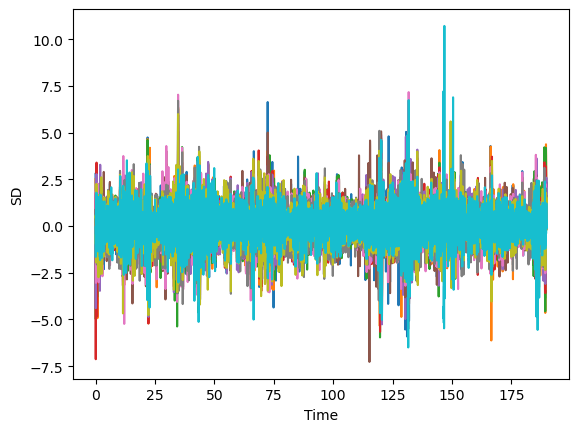

In [88]:
for i in range(10):
    plt.plot(t,fl1[:,i])
plt.xlabel('Time')
plt.ylabel('SD');

In [150]:
type(t), type(fl1)
thr = 2

(-4.0, 4.0)

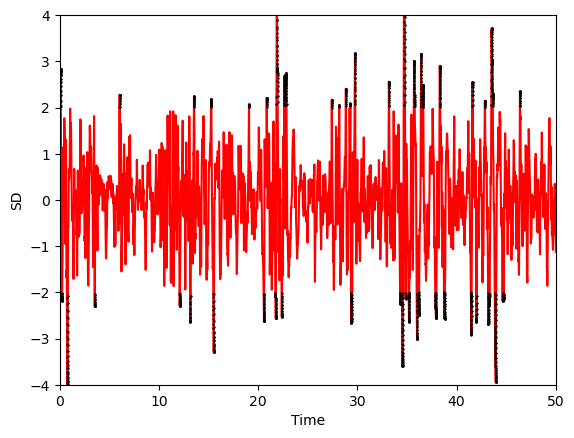

In [149]:
plt.plot(t,fl1[:,0], color="red")
plt.plot(t[np.abs(fl1[:,0])>thr],fl1[:,0][np.abs(fl1[:,0])>thr], '.',color="black", markersize = '1.5') ## here some correction
plt.xlabel('Time')
plt.ylabel('SD')
plt.xlim(0,50);
plt.ylim(-4,4)

In [151]:
channels = fl1.T

In [152]:

thr = 2
final_t = np.zeros(channels[0].shape)
o = 0
for i in channels:
    final_t += np.array(np.abs(i)> thr, dtype = float)
    o+= 1
print(o)
final_t = np.array(final_t, dtype = bool)
final_t = np.array(final_t, dtype = float)


10


In [153]:
av_indice_start = np.where((final_t[1:] - final_t[:-1]) >0)[0]### these are the indices where an avalanche begins
av_indice_end = np.where((final_t[1:] - final_t[:-1])< 0)[0]### these are the indices where an avalanche ends

In [154]:
from matplotlib import cm
colors = cm.Reds(np.linspace(0.2,1,channels.shape[0]))

In [155]:
T  = t[-1]

In [159]:
np.array((final_t[1:] - final_t[:-1])< 0).shape

(94869,)

In [162]:
#for jj in range(len(av_indice_start)):
#    print(t[av_indice_start[jj]],t[av_indice_end[jj]]);

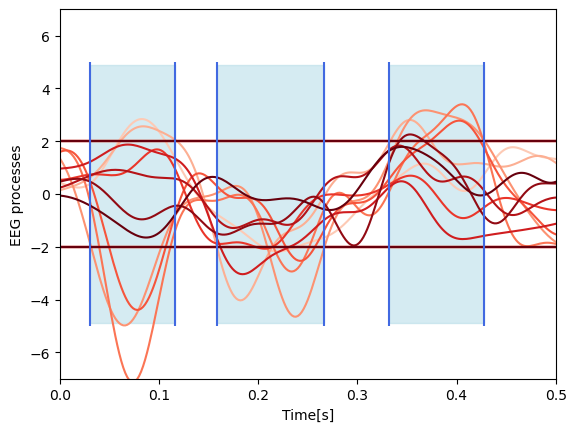

In [180]:
for g in range(len(channels)):
    plt.plot(t,channels[g],color = colors[g])
    plt.hlines(thr, 0,T,color = colors[g])
    plt.hlines(-thr, 0,T,color = colors[g])
    
for jj in range(len(av_indice_start)):
    plt.axvspan(t[av_indice_start[jj]],t[av_indice_end[jj]],0.15,0.85, color = 'lightblue', alpha = .5)
    
#plt.vlines(t[np.array(final_t, dtype = bool)],-10,10, alpha = )
plt.vlines(t[av_indice_start],-5,5, color = 'royalblue')
plt.vlines(t[av_indice_end],-5,5, color = 'royalblue')

plt.xlabel('Time[s]')
plt.ylabel('EEG processes');
plt.xlim(0.,0.5);
plt.ylim(-7,7);

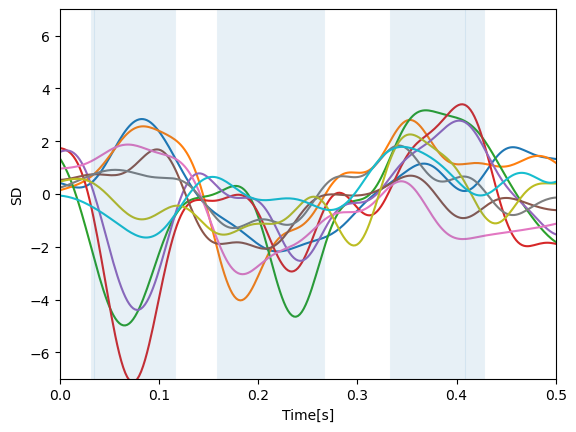

In [182]:

for i in range(10):
    plt.plot(t,fl1[:, i])
#
plt.vlines(t[np.array(final_t, dtype = bool)],-10,10, alpha =   0.1)
plt.xlabel('Time[s]')
plt.ylabel('SD');
plt.xlim(0.,0.5);
plt.ylim(-7,7);

In [60]:
len(final_t)

94870

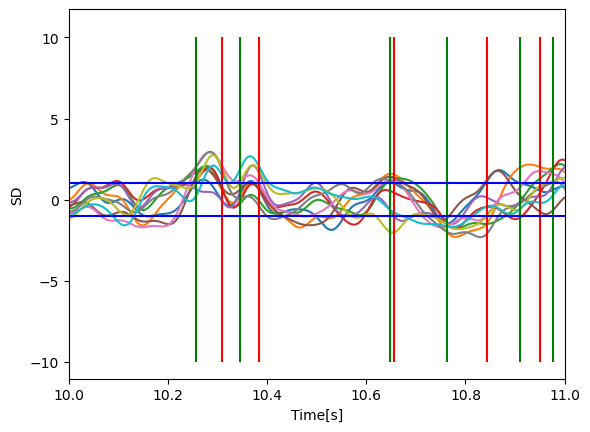

In [183]:
for i in range(10):
    plt.plot(t,fl1[:,i])

plt.vlines(t[av_indice_start],-10,10, color = 'green')
plt.vlines(t[av_indice_end],-10,10, color = 'red')

#plt.vlines(t[np.array(final_t, dtype = bool)],-10,10, alpha =   0.3)

plt.hlines(1, 0,180,'b')
plt.hlines(-1, 0,180,'b')

#plt.hlines(np.std(x2), 0,T,'b')
#plt.hlines(-np.std(x2), 0,T,'b')

plt.xlabel('Time[s]')
plt.ylabel('SD');
plt.xlim(10,11);

In [115]:
len(av_indice_start), len(av_indice_end)

(543, 543)

In [184]:
flag = False
flag2 = False
if len(av_indice_start) < len(av_indice_end): flag = True
if len(av_indice_start) > len(av_indice_end): flag2 = True
    
    
if flag: 
    av_indice_start = np.insert(av_indice_start,0,0) ## I corrected here
if flag2:
    #print(av_indice_end)
    av_indice_end = np.append(av_indice_end,len(fl1[:,0])-1)


In [185]:
len(av_indice_end),len(av_indice_start)

(543, 543)

In [190]:
global_signal = np.zeros(channels[0].shape)
o = 0
for i in channels:
    global_signal += np.abs(i)
    o+= 1
print(o)

avalanche_sizes = []
avalanche_dur = []

for s in range(len(av_indice_start)):
    if len(av_indice_start) != len(av_indice_end):
        print('Error, they must be of the same length')
        break
    avalanche_sizes.append(np.sum(global_signal[av_indice_start[s]:av_indice_end[s]]))
    avalanche_dur.append(round(t[av_indice_end[s]]- t[av_indice_start[s]],3))

10


In [189]:
t

array([0.00000e+00, 2.00000e-03, 4.00000e-03, ..., 1.89734e+02,
       1.89736e+02, 1.89738e+02])

In [192]:
avalanche_dur;